In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ktrain
!pip install tf_keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain
from ktrain import text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 19.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=54769130060fec49d96f12434a3ec50481d91fbeaac979d8e4cc977775b54bbc
  Stored in directory: /root/.cache/pip/wheels/a6/b9/88/364e4ea6461e9f1feee834bfc2f15b92edc62600e08e3d3f5f
  Created wheel for keras_bert: filename=ke

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

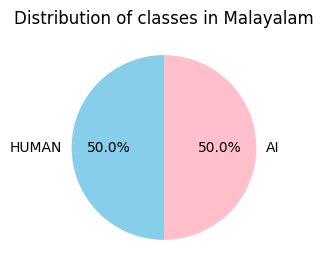

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Malayalam/mal_training_data_hum_ai.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Malayalam/mal_test.csv')

train_text = train_df['DATA']
train_labels = train_df['LABEL']
test_text = test_df['DATA']
test_labels = test_df['Label']

# Count label distribution
label_counts = train_labels.value_counts()

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Distribution of classes in Malayalam')
plt.show()

In [ ]:
train_df['LABEL'].value_counts()

,count
LABEL,
HUMAN,400
AI,400


In [ ]:
classes_list = ["HUMAN", "AI"]
train_labels = train_labels.apply(classes_list.index)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_text, train_labels, test_size=0.2, random_state=42)

In [ ]:
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(X_train), np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 13
	95percentile : 28
	99percentile : 46


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 13
	95percentile : 25
	99percentile : 34


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "Mal_xlm"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 20, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to Mal_xlm
20/20 - 94s - loss: 0.6891 - accuracy: 0.5266 - val_loss: 0.6617 - val_accuracy: 0.5250 - 94s/epoch - 5s/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.52500 to 0.84375, saving model to Mal_xlm
20/20 - 87s - loss: 0.6188 - accuracy: 0.6453 - val_loss: 0.5018 - val_accuracy: 0.8438 - 87s/epoch - 4s/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.84375
20/20 - 6s - loss: 0.5061 - accuracy: 0.8359 - val_loss: 0.5514 - val_accuracy: 0.8000 - 6s/epoch - 297ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.84375 to 0.89375, saving model to Mal_xlm
20/20 - 67s - loss: 0.3544 - accuracy: 0.8906 - val_loss: 0.2685 - val_accuracy: 0.8938 - 67s/epoch - 3s/step
Epoch 5/20

Epoch 5: val_accuracy improved from 0.89375 to 0.91250, saving model to Mal_xlm
20/20 - 81s - loss: 0.2410 - accuracy: 0.9234 - val_loss: 0.2007 - v

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

5/5 [==============================] - 4s 178ms/step
              precision    recall  f1-score   support

       HUMAN       0.96      0.96      0.96        80
          AI       0.96      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



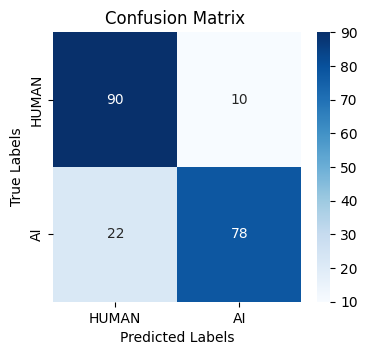

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

Accuracy: 0.84
F1 Score (Macro): 0.84
Precision (Macro): 0.84
Recall (Macro): 0.84


In [ ]:
MODEL_NAME = 'albert-base-v2'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(X_train), np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

preprocessing train...
language: ml
train sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 45


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 33


In [ ]:
filepath = "AI_Tamil_albert"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 20, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.69375, saving model to AI_Tamil_albert
20/20 - 49s - loss: 0.6887 - accuracy: 0.5406 - val_loss: 0.6224 - val_accuracy: 0.6938 - 49s/epoch - 2s/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.69375 to 0.70000, saving model to AI_Tamil_albert
20/20 - 24s - loss: 0.6547 - accuracy: 0.6016 - val_loss: 0.6025 - val_accuracy: 0.7000 - 24s/epoch - 1s/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.70000
20/20 - 4s - loss: 0.6527 - accuracy: 0.6203 - val_loss: 0.6850 - val_accuracy: 0.4938 - 4s/epoch - 203ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.70000
20/20 - 6s - loss: 0.6352 - accuracy: 0.6328 - val_loss: 0.5868 - val_accuracy: 0.6938 - 6s/epoch - 288ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.70000
20/20 - 5s - loss: 0.6425 - accuracy: 0.6203 - val_loss: 0.6106 - val_accuracy: 0.6938 - 5s/epoch - 237ms/ste

In [ ]:
# 93.75 val acc without stopwords

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

5/5 [==============================] - 4s 165ms/step
              precision    recall  f1-score   support

       HUMAN       0.79      0.55      0.65        80
          AI       0.65      0.85      0.74        80

    accuracy                           0.70       160
   macro avg       0.72      0.70      0.69       160
weighted avg       0.72      0.70      0.69       160



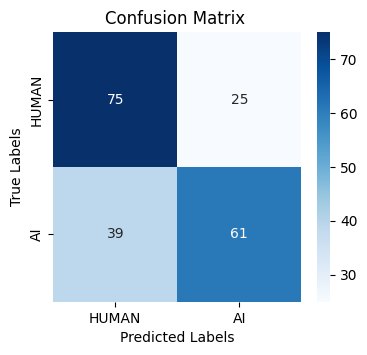

In [ ]:
true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

In [ ]:
# 68

In [ ]:
MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(X_train), np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessing train...
language: ml
train sequence lengths:
	mean : 13
	95percentile : 28
	99percentile : 46


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 13
	95percentile : 25
	99percentile : 34


In [ ]:
filepath = "AI_Mal_mbert"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 18, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/18

Epoch 1: val_accuracy improved from -inf to 0.55625, saving model to AI_Mal_mbert
20/20 - 114s - loss: 0.6797 - accuracy: 0.5734 - val_loss: 0.6679 - val_accuracy: 0.5562 - 114s/epoch - 6s/step
Epoch 2/18

Epoch 2: val_accuracy improved from 0.55625 to 0.80000, saving model to AI_Mal_mbert
20/20 - 82s - loss: 0.5319 - accuracy: 0.7437 - val_loss: 0.4279 - val_accuracy: 0.8000 - 82s/epoch - 4s/step
Epoch 3/18

Epoch 3: val_accuracy did not improve from 0.80000
20/20 - 5s - loss: 0.3575 - accuracy: 0.8484 - val_loss: 0.5210 - val_accuracy: 0.7937 - 5s/epoch - 262ms/step
Epoch 4/18

Epoch 4: val_accuracy improved from 0.80000 to 0.80625, saving model to AI_Mal_mbert
20/20 - 77s - loss: 0.2857 - accuracy: 0.8813 - val_loss: 0.4188 - val_accuracy: 0.8062 - 77s/epoch - 4s/step
Epoch 5/18

Epoch 5: val_accuracy did not improve from 0.80625
20/20 - 6s - loss: 0.1625 - accuracy: 0.9438 - val_loss: 0.4690 - val_accuracy: 

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

5/5 [==============================] - 5s 243ms/step
              precision    recall  f1-score   support

       HUMAN       0.87      0.85      0.86        80
          AI       0.85      0.88      0.86        80

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



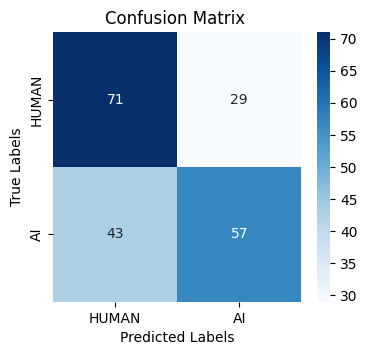

In [ ]:
true_labels = test_labels.values
predictions = predict

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

Accuracy: 0.64
F1 Score (Macro): 0.64
Precision (Macro): 0.64
Recall (Macro): 0.64


In [ ]:
MODEL_NAME = 'google/muril-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(X_train), np.array(y_train))
val = t.preprocess_test(np.array(X_val), np.array(y_val))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

preprocessing train...
language: ml
train sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 45


Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 12
	95percentile : 23
	99percentile : 33


In [ ]:
filepath = "AI_Mal_muril"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 18, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/18

Epoch 1: val_accuracy improved from -inf to 0.58750, saving model to AI_Mal_muril
20/20 - 143s - loss: 0.6933 - accuracy: 0.4734 - val_loss: 0.6931 - val_accuracy: 0.5875 - 143s/epoch - 7s/step
Epoch 2/18

Epoch 2: val_accuracy improved from 0.58750 to 0.63125, saving model to AI_Mal_muril
20/20 - 133s - loss: 0.6926 - accuracy: 0.5531 - val_loss: 0.6907 - val_accuracy: 0.6313 - 133s/epoch - 7s/step
Epoch 3/18

Epoch 3: val_accuracy did not improve from 0.63125
20/20 - 6s - loss: 0.6909 - accuracy: 0.5641 - val_loss: 0.6877 - val_accuracy: 0.5375 - 6s/epoch - 281ms/step
Epoch 4/18

Epoch 4: val_accuracy did not improve from 0.63125
20/20 - 6s - loss: 0.6547 - accuracy: 0.7031 - val_loss: 0.6683 - val_accuracy: 0.6125 - 6s/epoch - 292ms/step
Epoch 5/18

Epoch 5: val_accuracy improved from 0.63125 to 0.68125, saving model to AI_Mal_muril
20/20 - 121s - loss: 0.6148 - accuracy: 0.7000 - val_loss: 0.6395 - val_accur

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

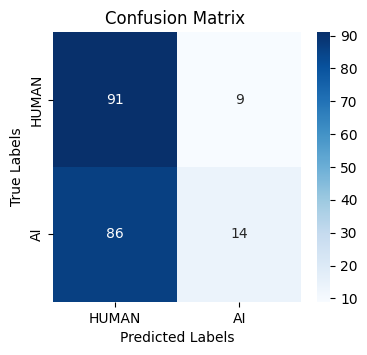

In [ ]:
true_labels = test_labels.values
predictions = predict

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

In [ ]:
Mal_stopwords = set(["ഏത്","എന്തിന്റെ","ഇത്ര","ഏറെ","ഇതേ","എന്ന","വേറെ","മതി","എല്ലാ","നിങ്ങളെ","വളരെ","എവിടെ","എപ്പോൾ","ഇന്ന്","ഉള്ള","ഇന്ന്","മറ്റു","ഈ","ഇത്","പോലെ","തന്റെ","വരെ","മാത്രം","എന്നാൽ","മുമ്പ്","തന്റെ","ഇനി","എങ്കിൽ","അല്ലെങ്കിൽ","കുറിച്ചു","പിന്നെ","എന്നത്","അന്ന്","എന്ത്"])

In [ ]:
import re
import string

def preprocess_Mal_english_text(text):
    # Remove unwanted characters (only keep Malayalam, English alphabets, and spaces)
    text = re.sub(r'[^a-zA-Zഅആഇഈഉഊഋഎഏഐഒഓഔകഖഗഘങചഛജഝഞടഠഡഢണതഥദധനപഫബഭമയരറലവശഷസഹളഴറ\൧-൯\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove Malayalam stopwords
    tokens = [word for word in tokens if word not in Mal_stopwords]
    # Return the cleaned text
    return " ".join(tokens)

In [ ]:
train_text = [preprocess_Mal_english_text(text) for text in train_text]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_text, train_labels, test_size=0.2, random_state=42)

In [ ]:
# test_text1 = test_df['DATA']
# model.load_weights(filepath)
# predictor = ktrain.get_predictor(learner.model, preproc=t)
# predict = predictor.predict(test_text1.values)

In [ ]:
# df = pd.DataFrame({
#     'ID': test_df['ID'],
#     'LABEL': predict
# })

In [ ]:
# import csv
# df.to_csv("/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Malayalam/MNLP_Malayalam_run1.tsv", sep="\t", quoting=csv.QUOTE_NONE, escapechar="\\", index=False)
# check_submission = pd.read_csv("/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Malayalam/MNLP_Malayalam_run1.tsv", sep="\t")
# check_submission.head()

,ID,LABEL
0,MAL_HUAI_TE_001,HUMAN
1,MAL_HUAI_TE_002,HUMAN
2,MAL_HUAI_TE_003,HUMAN
3,MAL_HUAI_TE_004,HUMAN
4,MAL_HUAI_TE_005,AI
